## Programming model

#### Babylonian method square root
Compute $\sqrt{x}$.
##### How?
Continue $ s \leftarrow (s + x /s) / 2 $ till $ s \rightarrow \sqrt{x}$.

In [74]:
### Python routine for implementation of Babylonian apporach

import numpy as np

def babylon(x, N):
    s = (1.0 + x)/2.0
    for i in range(1, N):
        s = (s + x/s) / 2.0
    return s

x = 2.0
print(f"Sqrt from Babylonian Approach: {babylon(x, 10)}")
print(f"Sqrt from NumPy Approach is: {np.sqrt(x)}")

Sqrt from Babylonian Approach: 1.414213562373095
Sqrt from NumPy Approach is: 1.4142135623730951


In [75]:
### Python routine for differentiations of Babylonian routine

def diff_babylonian(x, N):
    s = (1.0 + x)/2.0
    s_prime = 1.0/ 2.0
    for i in range(1, N):
        s = (s + x/s) / 2.0
        s_prime = (1/2.0)*(s_prime + (s - x * s_prime)/(s**2))
    return s, s_prime

s, s_prime = diff_babylonian(2, 10)

print(f"value of sqrt(x) is : {s}")
print(f"Derivative of sqrt(x) is: {s_prime}")
print(f"Analytical derivative of sqrt(x) is: {0.5 *1/np.sqrt(2)}")


value of sqrt(x) is : 1.414213562373095
Derivative of sqrt(x) is: 0.35355339059327373
Analytical derivative of sqrt(x) is: 0.35355339059327373


In [9]:
!pip install sympy

You should consider upgrading via the '/Users/raj/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import sympy as sp
x = sp.symbols("x")

# Symbolic for Function Evaluation
print("Symbolic for Function Evaluation")
for i in range(0, 5):
    print(sp.simplify(babylon(x, i)))

print("***********+++++++***********")
print("***********+++++++***********")
print("***********+++++++***********")
print("Symbolic for Derivative Evaluation")
for j in range(0, 5):
    print(sp.simplify(sp.simplify(sp.diff(babylon(x, i)))))

Symbolic for Function Evaluation
0.5*x + 0.5
0.5*x + 0.5
0.25*x + 1.0*x/(x + 1) + 0.25
(0.015625*x**4 + 0.4375*x**3 + 1.09375*x**2 + 0.4375*x + 0.015625)/(0.125*x**3 + 0.875*x**2 + 0.875*x + 0.125)
(6.103515625e-5*x**8 + 0.00732421875*x**7 + 0.111083984375*x**6 + 0.48876953125*x**5 + 0.7855224609375*x**4 + 0.48876953125*x**3 + 0.111083984375*x**2 + 0.00732421875*x + 6.103515625e-5)/(0.0009765625*x**7 + 0.0341796875*x**6 + 0.2666015625*x**5 + 0.6982421875*x**4 + 0.6982421875*x**3 + 0.2666015625*x**2 + 0.0341796875*x + 0.0009765625)
***********+++++++***********
***********+++++++***********
***********+++++++***********
Symbolic for Derivative Evaluation
(3.72529029846191e-9*x**20 + 3.87430191040039e-7*x**19 + 2.16737389564514e-5*x**18 + 0.000664353370666504*x**17 + 0.0112408436834812*x**16 + 0.115458369255066*x**15 + 0.761909335851669*x**14 + 3.33969330787659*x**13 + 9.95655024796724*x**12 + 20.4859389662743*x**11 + 29.3279034942389*x**10 + 29.3301267623901*x**9 + 20.4844993725419*x**8

In [76]:
#Can not deal with Conditinals

from sympy import symbols, diff
def f(x):
    if x > 2:
        return x * 2 + 5
    return x / 2 + 5

x = symbols("x")
dfdx = diff(f(x))
print(dfdx)

TypeError: cannot determine truth value of Relational

## Dual Numbers

### Addition rule
$$
h(x) = f(x) + g(x)
$$
$$
h'(x) = f'(x) + g'(x)
$$


### Product rule
$$
h(x) = f(x)*g(x)
$$

$$
h'(x) = f'(x)*g(x) + g'(x)f(x)
$$

### Quotient rule
$$
h(x) = \frac{f(x)}{g(x)}
$$
$$
h'(x) = \frac{g(x)f'(x) -f(x)g'(x)}{g(x)^2}
$$

### Chain rule
$$
f(x) = g(h(x))
$$

$$
f'(x) = g'(h(x))h'(x)
$$

Consider $f(x) = \sin(h(x))$
$$
\frac{\rm d}{\rm dx} \sin(h(x)) = \cos(h(x))\frac{\rm dh}{\rm dx}
$$

In [80]:
from math import sin, cos

class Dual(object):
    def __init__(self, x, ϵ=1):
        self.x = x
        self.ϵ = ϵ
        
    def __str__(self):
        return str(self.x) + " + " + str(self.ϵ) + "ϵ"
    
    def __mul__(self, d):
        return Dual(self.x * d.x, self.x*d.ϵ + d.x*self.ϵ)
    
    def __add__(self, d):
        return Dual(self.x + d.x, self.ϵ + d.ϵ)
    
    def __truediv__(self, d):
        return Dual(self.x/d.x, ((d.x *self.ϵ - d.ϵ * self.x )/d.x**2))
    
    def d_sin(self):
        return Dual(sin(self.x), cos(self.x)*self.ϵ)

In [83]:
# # Addition
# D=Dual(2,1) + Dual(3, 0)  ### For f(x)=x+3 @ x=2
# print(D)

# # multiplication # f(x) = (x + 3) * (x + 2) @x=2
D = (Dual(2, 1) + Dual(3, 0)) * (Dual(2,1) + Dual(2, 0)) 
print(D)

20 + 9ϵ


<div>
<img src="https://discuss.pytorch.org/uploads/default/original/2X/3/35226d9fbc661ced1c5d17e374638389178c3176.png" width="500" style="margin: 55px auto; display: block; position: relative; left: -30px;" />
</div>

<!--NAVIGATION-->
# PyTorch Primer | [TensorFlow Primer](2-tf.ipynb) |  [PyTorch vs TensorFlow](3-pytorch_vs_tf.ipynb) |  [JAX](4-jax.ipynb)

## Submodule -1.4 : A Primer on PyTorch and Tensorflow

## Table of Contents

#### 1. [Installation](#Building-PyTorch-and-TensorFlow)
#### 2. [Visualizing graph based computation](#Cosntruct-the-Graph-(Tree)-of-following-expressions)
#### 3. [Basics of PyTorch](#Basics-of-PyTorch)
#### 4. [Automatic Differentiation](#Automatic-Differentiation)
#### 5. [Function Approximations](#Function-Approximations)


# Building PyTorch and TensorFlow

### Install PyTorch

In [2]:
!pip3 install torch torchvision torchaudio

### Install TensorFlow2

In [ ]:
!pip3 install tensorflow

### Packages in current environment

In [4]:
#!pip freeze


In [8]:
#!pip install graphviz
#!pip install seaborn


In [1]:
# Import the things we need to plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')

## Readings

+ These notes.

+ [Conceptual Programming with Python By Thorsten Altenkirch and Isaac Triguero](https://www.lulu.com/en/gb/shop/isaac-triguero-and-thorsten-altenkirch/conceptual-programming-with-python/paperback/product-1e4re5rj.html?page=1&pageSize=4)


# Cosntruct the Graph (Tree) of following expressions

Evaluate following expressions by designing the premitives
$$
ex1: 3*(y + x)
$$

and
$$
ex2: 3*y + x
$$

###### Cosntruct the Graph (Tree) of above expressions

8*(y+x)


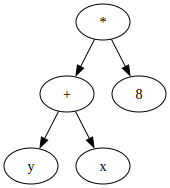

In [11]:
print("8*(y+x)")
from graphviz import Digraph
g1 = Digraph('ex1')
g1.node('*', label='*')
g1.node('+', label='+')
g1.node('8', label='8')
g1.node('y', label='y')
g1.node('x', label='x')
g1.edge('*','8')
g1.edge('*','+')
g1.edge('+', 'y')
g1.edge('+', 'x')
g1.render('ex1', format='png') # Uncomment if you want to save the figure
g1


8*y+x


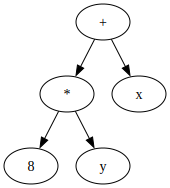

In [12]:
print("8*y+x")
g2 = Digraph('ex2')
g2.node('*', label='*')
g2.node('+', label='+')
g2.node('8', label='8')
g2.node('y', label='y')
g2.node('x', label='x')
g2.edge('+','*')
g2.edge('+','x')
g2.edge('*', '8')
g2.edge('*', 'y')
g2.render('ex2', format='png') # Uncomment if you want to save the figure
g2

In [84]:
# Super class for Expressions:

class Expr:
    pass

### Subclass of Expr for Constant e.g., 3

class Const(Expr):
    def __init__(self, val):
        self.val = val  
        
    def getVal(self):
        return self.val
    
    def __str__(self):
        return str(self.getVal())
    
    def eval(self, env):
        return self.getVal()

### Subclass of Expr for Variables e.g., x, y       
class Var(Expr):
    def __init__(self, name):
        self.name = name
        
    def getName(self):
        return self.name
        
    def __str__(self):
        return self.getName()
    
    def eval(self, env):
        return env[self.name]

### Subclass of Expr for Binary Operations: e.g., x, y       
class Times(Expr):
    def __init__(self, l, r):
        self.l = l
        self.r = r
        
    def getLeft(self):
        return self.l
    
    def getRight(self):
        return self.r
          
    def __str__(self):
        return "(" + str(self.getLeft()) + "*" + str(self.getRight()) + ")"
    
    def eval(self, env):
        return self.getLeft().eval(env)*self.getRight().eval(env)

class Plus(Expr):
    def __init__(self, l, r):
        self.l = l
        self.r = r
    def __str__(self):
        return "(" + str(self.l) + "+" + str(self.r) + ")"
    
    def getLeft(self):
        return self.l
    
    def getRight(self):
        return self.r
    
    def eval(self, env):
        return self.getLeft().eval(env) + self.getRight().eval(env)
        
### Let's print ex1: 8*(y + x)
ex1 = Times(Const(8), Plus(Var("y"),Var("x")))

### Let's print ex1: 3*y + x
ex2 = Plus(Times(Const(8), Var("y")), Var("x")) 

print(ex1)
print(ex2)

(8*(y+x))
((8*y)+x)


In [85]:
# Evaluate The Expressions
vals = {"x":5, "y":10}
ex1.eval(vals)


120

# Basics of PyTorch

#### Tensors and Properties

In [13]:
import torch

In [14]:
import numpy as np

In [91]:
# Set seed for reproducibility
np.random.seed(0)


# Predefine Matrix of shape=(2,3)
np.array([[4, 5, 6], [1, 7, 8]])

# Zero Matrix of shape=(3,3)
np.zeros((3,3))

# Identity Matrix of shape=(2,2)
np.eye(2)

# Random Matrix of shape=(3,3)
np.random.rand(3,3)

array([[0.5488135 , 0.71518937, 0.60276338],
       [0.54488318, 0.4236548 , 0.64589411],
       [0.43758721, 0.891773  , 0.96366276]])

In [17]:
# Set seed for reproducibility
#np.random.seed(0)


# Predefine Matrix of shape=(2,3)
np.array([[4, 5, 6], [1, 7, 8]])

# Zero Matrix of shape=(3,3)
np.zeros((3,3))

# Identity Matrix of shape=(2,2)
np.eye(2)

# Random Matrix of shape=(3,3)
np.random.rand(3,3)

array([[0.46207428, 0.62640764, 0.20812877],
       [0.42017231, 0.91309242, 0.59481331],
       [0.25973519, 0.71615789, 0.53849798]])

In [18]:
# Set seed for reproducibility
torch.manual_seed(0)


# Predefine Matrix of shape=(2,3)
x = torch.tensor([[4, 5, 6], [1, 7, 8]])
print(type(x))

# Zero Matrix of shape=(3,3)
torch.zeros((3,3))

# Identity Matrix of shape=(2,2)
torch.eye(2)

# Random Matrix of shape=(3,3)
torch.rand(3,3)

<class 'torch.Tensor'>


tensor([[0.4963, 0.7682, 0.0885],
        [0.1320, 0.3074, 0.6341],
        [0.4901, 0.8964, 0.4556]])

In [19]:
##### Dimension operations on Tensors.
import torch
# Scalar
s = torch.tensor(1.)
print(f"Sclaar x: {s}")

# Check dimension of Scalar
d = s.dim()
print(f"Dimension of vector is: {d}")

# Vectors
v = torch.tensor([1., 2., 3.])
print(f"Vector v: {v}")
#Check dimension of Vectors
d = v.dim()
print(f"Dimension of vector is: {d}")


# Matrix
m = torch.tensor([[1., 2., 3.],[4., 5., 6.]])
d = m.dim()
print(f"Dimension of matrix is: {d}")


# Tensor
# Matrix
m = torch.tensor([[[1., 2., 3.],[4., 5., 6.], [1., 2., 3.],[4., 5., 6.]]])
d = m.dim()
print(f"Dimension of Tensor is: {d}")




Sclaar x: 1.0
Dimension of vector is: 0
Vector v: tensor([1., 2., 3.])
Dimension of vector is: 1
Dimension of matrix is: 2
Dimension of Tensor is: 3


#### Methods on Tensors

###### Sum

In [20]:
# Set seed for reproducibility
torch.manual_seed(0)


# Random Matrix of shape=(3,3)
x = torch.rand(3,2)
print(f"x: {x}")

xsum = torch.sum(x, dim=1)
print(f"xsum using mthod1: {xsum}")

x.sum(dim=1)
print(f"xsum using mthod2: {xsum}")



x: tensor([[0.4963, 0.7682],
        [0.0885, 0.1320],
        [0.3074, 0.6341]])
xsum using mthod1: tensor([1.2645, 0.2205, 0.9415])
xsum using mthod2: tensor([1.2645, 0.2205, 0.9415])


###### Reshape : `view` and  `reshape`  methods

In [24]:
#### Inplace Reshaping

# A vector of length N=10
x = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# Reshape in amatrix of shape= (3,4)
x = x.view(3,4)
print(f"x={x}")

# Reshape with unspecified number of rows and 4 column
x = x.view(-1, 4)
print(f"x={x}")

#### Reshaping via copying
# A vector of length N=10
x = torch.tensor([1,2,3,4,5,6,7,8,9,10,11,12])

# Reshape in amatrix of shape= (3,4)
y3 = x.reshape(3,4)

# Reshape with unspecified number of rows and 4 column
y4 = x.reshape(-1,4)

x=tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
x=tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


###### Computing Norm of a vector using `norm` method

$$
L_p~\text{norm}:
||{\mathbf{x}}||_p = \left(\sum_i |x_i|^p\right)^{\frac{1}{p}}
$$


$$
L^1~\text{norm}:
|| {\mathbf{x}} ||_1 = |x_1| + |x_2| + \ldots + |x_n|
$$

$$
L^2~\text{norm}:
|| {\mathbf{x}} ||_2 = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}
$$



In [17]:
torch.manual_seed(0)
x = torch.rand(3)
x.norm(p=1)
x.norm(p=2)
print(f"L1 Norm of x is:{x.norm(p=1)}")
print(f"L2 Norm of x is:{x.norm(p=2)}")

L1 Norm of x is:1.3529558181762695
L2 Norm of x is:0.9188381433486938


###### Computing Norm of a vector without using the method

In [18]:
n1 = torch.sum(torch.abs(x))
print(f"L1 norm: is: {n1}")
n2 = torch.sqrt(torch.sum(x**2))
print(f"L2 norm: is: {n2}")

## Or Calling method directly on the data structures
n1 = x.abs().sum()
print(f"L1 norm: is: {n1}")
n2 = (x**2).sum().sqrt() 
print(f"L2 norm: is: {n2}")

L1 norm: is: 1.3529558181762695
L2 norm: is: 0.9188381433486938
L1 norm: is: 1.3529558181762695
L2 norm: is: 0.9188381433486938


### Tensors on GPU

In [92]:
import torch
torch.cuda.is_available()  # Check if we can use GPUs

False

In [26]:
x = torch.Tensor([[4,5,8], [3,8,9]])

### Mapping tensors to GPU

In [27]:
dev_cpu = torch.device("cpu")
dev_gpu = torch.device("cuda:0")

# Send Tensor to GPU
x.to(dev_gpu)


AssertionError: Torch not compiled with CUDA enabled

In [22]:
# At the start of your code
device = torch.device("cpu" if not torch.cuda.is_available() else "cuda")

# For later dispatch
x.to(device)

tensor([[4., 5., 8.],
        [3., 8., 9.]])

### NumPy ----> PyTorch ----> NumPy

In [94]:
import numpy as np
x = np.random.random((4,4))
print(x)

[[0.38344152 0.79172504 0.52889492 0.56804456]
 [0.92559664 0.07103606 0.0871293  0.0202184 ]
 [0.83261985 0.77815675 0.87001215 0.97861834]
 [0.79915856 0.46147936 0.78052918 0.11827443]]


In [101]:
# NumPy to PyTorch
# y = torch.from_numpy(x)

# # Set this array to differentiable
# #y=y.requires_grad_()
# print(y.requires_grad_)

# y=y.requires_grad_()
# #print(y.requires_grad_())
# #print(y.requires_grad)


# ## Create a Tensor with requires Grad true
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)


#If you already have a tensor but it was created without requires_grad=True, 
#you can enable it like this:

x = torch.tensor([1.0, 2.0, 3.0])
x = x.detach().requires_grad_()  # Detach and set requires_grad=True

print(x.requires_grad)  # Output: True

True


In [102]:
# Why requires_grad=True is useful
import torch
x = torch.tensor([2.0], requires_grad=True)  
f = x**2 + 3*x + 2
f.backward()
# Print the gradient
print("Gradient at x=2:", x.grad)  


Gradient at x=2: tensor([7.])


In [103]:
import torch
xy = torch.tensor([2.0, 3.0], requires_grad=True)  

# Define the function f(x, y) = x^2 + y^2 + 3xy
f = xy[0]**2 + xy[1]**2 + 3 * xy[0] * xy[1]
f.backward()

# Print gradients
print("Gradient (df/dx, df/dy):", xy.grad)  


Gradient (df/dx, df/dy): tensor([13., 12.])


In [55]:
import torch

def gradients(outputs, inputs):
    return torch.autograd.grad(outputs, inputs, grad_outputs=torch.ones_like(outputs), create_graph=True)

# Define a vector input with requires_grad=True
x = torch.tensor([[2.0], [3.0], [4.0]], requires_grad=True)  

# Define the function with vector output
f1 = x[0]**2        # f1(x1) = x1^2
f2 = torch.exp(x[1]) # f2(x2) = e^x2
f3 = torch.sin(x[2]) # f3(x3) = sin(x3)
f = torch.stack([f1, f2, f3])  # Stack outputs to form a vector function
df = gradients(f, x)


torch.Size([3, 1])

In [70]:
# PyTorch ---> NumPy

In [39]:
x = y.numpy()
#print(X)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

### Timing GPU Operations

In [54]:
A = torch.rand(100, 400, 400)
#B = A.cuda()
A.size()

torch.Size([100, 400, 400])

In [55]:
%timeit -n 3 torch.bmm(A, A)
#%timeit -n 3 torch.bmm(B, B)

120 ms ± 9.29 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)



$$
a = 8\\
b = 6\\
c = a + b\\
d = a * c\\
$$
Compute $ \frac{\partial d}{\partial a}$
High School Approach:

1. $\qquad d = a*c$

2. $\qquad  \frac{\partial d}{\partial a} = c * \frac{\partial a}{\partial a} + a * \frac{\partial c}{\partial a}$

3. $\qquad  \frac{\partial d}{\partial a} = c + a* \frac{\partial c}{\partial a}$
4. $\qquad  \frac{\partial d}{\partial a} = (a + b) + a*\frac{\partial a}{\partial a} + a * \frac{\partial b}{\partial a} $
5. $\qquad  \frac{\partial d}{\partial a} = a + b + a*(1 + 0)$
6. $\qquad  \frac{\partial d}{\partial a} = 2a + b $
7. $\qquad  \frac{\partial d}{\partial a} = 2*8+ 6 = 22 $

In case if you need to $\frac{\partial d}{\partial b}$, steps 1-7 need to carried out again.
"

# Automatic Differentiation

In [15]:
from collections import defaultdict
class Var:
    def __init__(self, val, local_grad=()):
        self.val = val
        self.local_grad = local_grad
         
    def __add__(self, other):
        y = self.val + other.val
        local_grad = ((self, 1), (other, 1))       
        return Var(y, local_grad)
    
    def __mul__(self, other):
        y = self.val*other.val
        local_grad = ((self, other.val), (other, self.val))
        return Var(y, local_grad)
    
    def __sub__(self, other):
        y = self.val - other.val
        local_grad = ((self, 1), (other, -1))       
        return Var(y, local_grad)
    
    
def get_grads(var):
    grad = defaultdict(lambda:0)
    
    def compute_grad(var, path):
        for child_var, loc_grad in var.local_grad:
            val_path_child = path * loc_grad
            grad[child_var] += val_path_child
            compute_grad(child_var,val_path_child)   
    
    compute_grad(var, path=1)
    
    return grad
    
    
    
    
   
        
        

In [18]:
a = Var(8)
b = Var(6)

## AD for Addition 

c = a + b
d = a*c

grad = get_grads(d)

print(f"AD of addition: {grad[a]}")

## AD for Subtraction 

c = a - b
d = a*c

grad = get_grads(d)

print(f"AD of subtraction: {grad[a]}")



AD of addition: 22
AD of subtraction: 10


# Einstein Summation

In [2]:
import torch
torch.manual_seed(1234)

In [3]:
A=torch.randint(3, 10, (3, 4))
B=torch.randint(3, 10, (4, 3))
A



tensor([[9, 7, 3, 8],
        [3, 4, 9, 7],
        [3, 5, 5, 6]])

In [4]:
B


tensor([[4, 8, 3],
        [6, 7, 4],
        [9, 8, 6],
        [4, 5, 8]])

In [32]:
torch.matmul(A, B)

tensor([[137, 185, 137],
        [145, 159, 135],
        [111, 129, 107]])

In [36]:
C= torch.einsum("ij, jk -> ik", A, B)
C

tensor([[137, 185, 137],
        [145, 159, 135],
        [111, 129, 107]])

In [5]:
torch.manual_seed(1234)
A=torch.randint(3, 10, (3, 4, 3))
B=torch.randint(3, 10, (3, 3, 4))
A



tensor([[[9, 7, 3],
         [8, 3, 4],
         [9, 7, 3],
         [5, 5, 6]],

        [[4, 8, 3],
         [6, 7, 4],
         [9, 8, 6],
         [4, 5, 8]],

        [[7, 8, 8],
         [9, 6, 4],
         [7, 4, 5],
         [7, 7, 6]]])

In [38]:
B

tensor([[[7, 5, 4, 4],
         [5, 6, 4, 6],
         [3, 7, 3, 8]],

        [[8, 6, 8, 6],
         [7, 9, 8, 4],
         [8, 4, 8, 5]],

        [[5, 9, 7, 4],
         [5, 5, 7, 3],
         [8, 7, 3, 7]]])

In [39]:
C = torch.einsum("bij, bjk->bik", A,B)
C

tensor([[[107, 108,  73, 102],
         [ 83,  86,  56,  82],
         [107, 108,  73, 102],
         [ 78,  97,  58,  98]],

        [[112, 108, 120,  71],
         [129, 115, 136,  84],
         [176, 150, 184, 116],
         [131, 101, 136,  84]],

        [[139, 159, 129, 108],
         [107, 139, 117,  82],
         [ 95, 118,  92,  75],
         [118, 140, 116,  91]]])

In [40]:
Ct = torch.matmul(A, B)

In [41]:
Ct


tensor([[[107, 108,  73, 102],
         [ 83,  86,  56,  82],
         [107, 108,  73, 102],
         [ 78,  97,  58,  98]],

        [[112, 108, 120,  71],
         [129, 115, 136,  84],
         [176, 150, 184, 116],
         [131, 101, 136,  84]],

        [[139, 159, 129, 108],
         [107, 139, 117,  82],
         [ 95, 118,  92,  75],
         [118, 140, 116,  91]]])

# Function Approximations

### Parabolic Function

In [35]:
!pip install torchsummary

You should consider upgrading via the '/Users/raj/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


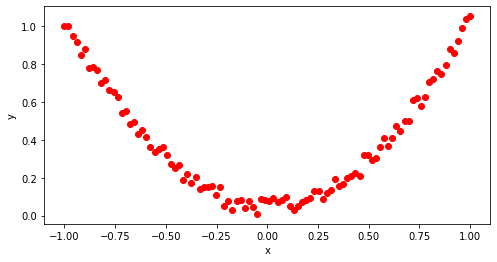

In [58]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
from torch.optim import Adam, LBFGS, SGD
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline


torch.manual_seed(1234)
 
N_p = 100
### Input data
x = torch.unsqueeze(torch.linspace(-1, 1, N_p), dim=1) 
# torch.unsqueeze: Returns a new tensor 
# with a dimension of size one inserted at the specified position.
y = torch.square(x)
# Add Random Noise
y = y + 0.1*torch.rand(y.size())

# Plot the data
plt.figure(figsize=(8,4))

x_plot, y_plot = x.numpy(), y.numpy()
plt.scatter(x_plot, y_plot, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show("Data for Regression Analysis")
plt.show()







----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 100, 40]              80
         LeakyReLU-2              [-1, 100, 40]               0
            Linear-3               [-1, 100, 1]              41
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.00
Estimated Total Size (MB): 0.06
----------------------------------------------------------------
Doing Iterations: 0 and Loss: 0.3845670223236084
Doing Iterations: 50 and Loss: 0.001984823029488325
Doing Iterations: 100 and Loss: 0.0008168928907252848
Doing Iterations: 150 and Loss: 0.0007374898414127529


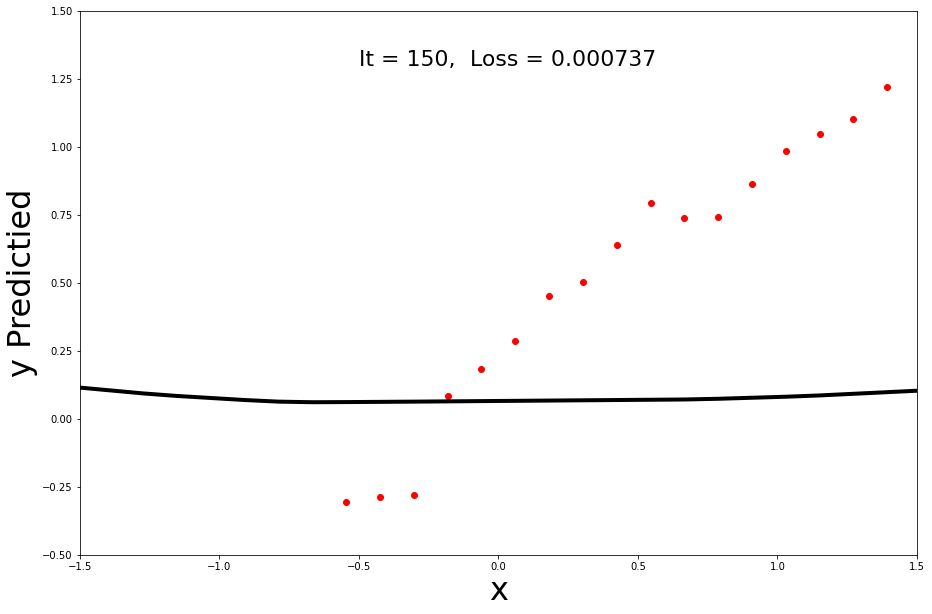

In [104]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
from torch.optim import Adam, LBFGS, SGD
import matplotlib.pyplot as plt
%matplotlib inline
from torchsummary import summary

## Set Seed
torch.manual_seed(1234) 

### Input data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
# torch.unsqueeze: Returns a new tensor 
# with a dimension of size one inserted at the specified position.

y = torch.square(x)
# Add Random Noise
y = y + 0.1*torch.rand(y.size())
# Convert x and y to tracked variables
in_dim = 1
out_dim = 1
Net = torch.nn.Sequential(
      torch.nn.Linear(in_dim, 40),
      torch.nn.LeakyReLU(),
      torch.nn.Linear(40, out_dim))

summary(Net, (100, 1))

# def init_weights(m):
#     if isinstance(m, torch.nn.Linear):
#         torch.nn.init.xavier_uniform(m.weight)
#         m.bias.data.fill_(0.00)
        
# Net.apply(init_weights)

# for name, params in Net.named_parameters():
#     if params.requires_grad:
#         print(f"name: {name}")
#         print(f"Params: {params}")


optimizer = torch.optim.Adam(Net.parameters(), lr = 0.01)
loss_function = torch.nn.MSELoss()

image_list = []
Niter = 150 + 1

fig, ax = plt.subplots(figsize=(15,10))

for it in range(Niter):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if it % 50 == 0:
        print(f"Doing Iterations: {it} and Loss: {loss}")
    plt.cla()
    ax.set_xlabel('x', fontsize=32)
    ax.set_ylabel('y Predictied', fontsize=32)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.scatter(x_plot, y_plot, color = "red")
    ax.plot(x_plot, y_pred.data.numpy(), 'k-', lw=4)
    ax.text(-0.5, 1.3, 'It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
    ax.text(-0.1, 1.3, 'Loss = %.6f' % loss.data.numpy(),
            fontdict={'size': 22, 'color':  'black'})

    fig.canvas.draw()      
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    image_list.append(image)
    
   

imageio.mimsave('./Parabolic_regression_1.gif', image_list, fps=5)
    



### Sin Function

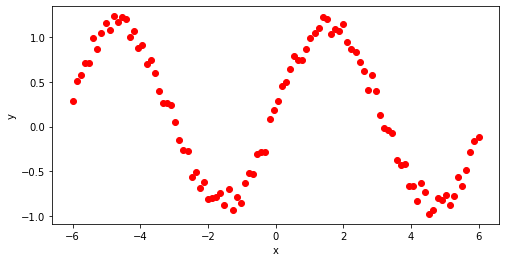

In [61]:
import numpy as np
import imageio
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1234) 

### Input data
x = torch.unsqueeze(torch.linspace(-6, 6, 100), dim=1) 
# torch.unsqueeze: Returns a new tensor 
# with a dimension of size one inserted at the specified position.
y = torch.sin(x)
# Add Random Noise
y = y + 0.30*torch.rand(y.size())

# Plot the data
plt.figure(figsize=(8,4))

x_plot, y_plot = x.numpy(), y.numpy()
plt.scatter(x_plot, y_plot, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show("Data for Regression Analysis")
plt.show()


Doing Iterations: 0 and Loss: 0.8034062385559082
Doing Iterations: 50 and Loss: 0.11373569816350937
Doing Iterations: 100 and Loss: 0.10786444693803787
Doing Iterations: 150 and Loss: 0.1027265265583992
Doing Iterations: 200 and Loss: 0.09231912344694138
Doing Iterations: 250 and Loss: 0.07583818584680557
Doing Iterations: 300 and Loss: 0.05385998263955116
Doing Iterations: 350 and Loss: 0.03373623639345169
Doing Iterations: 400 and Loss: 0.019916106015443802
Doing Iterations: 450 and Loss: 0.01475592702627182
Doing Iterations: 500 and Loss: 0.01173159759491682
Doing Iterations: 550 and Loss: 0.009939510375261307
Doing Iterations: 600 and Loss: 0.011952796950936317
Doing Iterations: 650 and Loss: 0.008818307891488075
Doing Iterations: 700 and Loss: 0.007790905889123678
Doing Iterations: 750 and Loss: 0.011379826813936234
Doing Iterations: 800 and Loss: 0.007007220759987831
Doing Iterations: 850 and Loss: 0.006975743919610977
Doing Iterations: 900 and Loss: 0.006732481066137552
Doing It

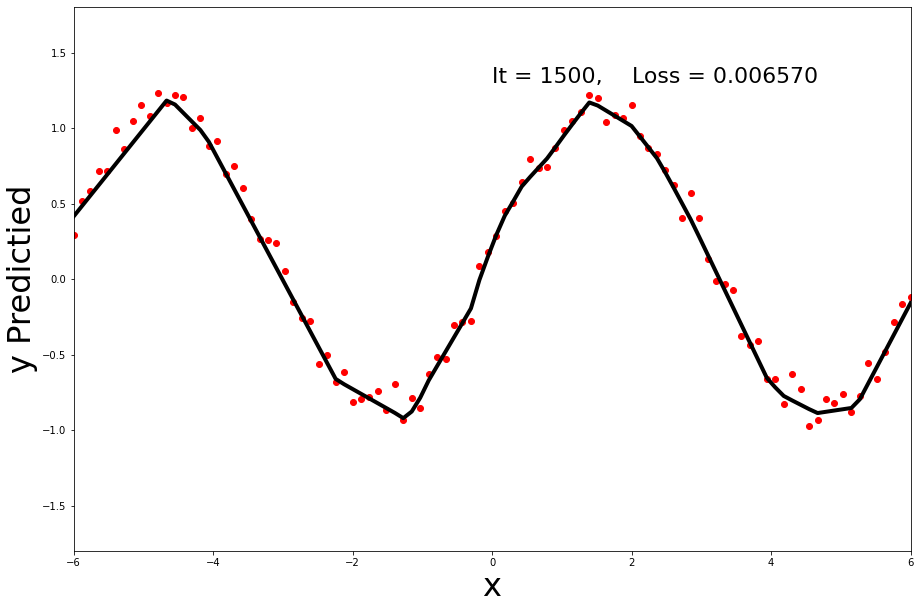

In [62]:
Net = torch.nn.Sequential(
      torch.nn.Linear(1, 100),
      torch.nn.LeakyReLU(),
      torch.nn.Linear(100, 1))

optimizer = torch.optim.Adam(Net.parameters(), lr = 0.01)
loss_function = torch.nn.MSELoss()

image_list = []
Niter = 1500 + 1

fig, ax = plt.subplots(figsize=(15,10))

for it in range(Niter):
    y_pred = Net(x)
    loss = loss_function(y_pred, y)  # Notice the order: NN Pred first and then actual value
    optimizer.zero_grad()    # Zero Out the gradient
    loss.backward()
    optimizer.step()
    if it % 50 == 0:
        print(f"Doing Iterations: {it} and Loss: {loss}")
    plt.cla()
    ax.set_xlabel('x', fontsize=32)
    ax.set_ylabel('y Predictied', fontsize=32)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-1.8, 1.8)
    ax.scatter(x_plot, y_plot, color = "red")
    ax.plot(x_plot, y_pred.data.numpy(), 'k-', lw=4)
    ax.text(0, 1.3, 'It = %d,' %it, fontdict={'size': 22, 'color':  'black'})
    ax.text(2, 1.3, 'Loss = %.6f' % loss.data.numpy(),
            fontdict={'size': 22, 'color':  'black'})

    fig.canvas.draw()      
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    image_list.append(image)    
   
imageio.mimsave('./Sin_Regression_2.gif', image_list, fps=20)

### Customizing Function

In [66]:
import torch
import torch.nn as nn 
from torch.nn.parameter import Parameter 
import numpy as np
import matplotlib.pyplot as plt

'''
clu = x * sigmoid(x) = (1/ (1 + exp(-x)))
'''


def caf(x):
    return x * (1.0/(1.0 + torch.exp(-x)))

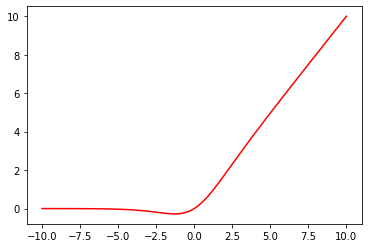

In [68]:
x = torch.linspace(-10, 10, 100).view((-1, 1))
y = caf(x)
plt.plot(x, y, "-r")

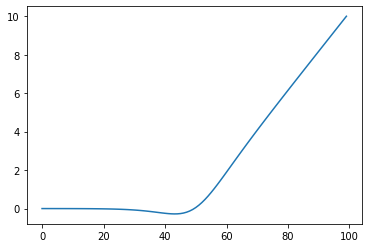

In [69]:
class CAF(nn.Module):
    
    def __init__(self):
        super().__init__()       
    
    def forward(self, x):
        return caf(x)
    
custom_af = CAF()

Net = torch.nn.Sequential(
     CAF()
     )

y = Net(x)

plt.plot(y.detach().numpy())

name: Linear-1.weight
 Shape: torch.Size([100, 1])
name: Linear-1.bias
 Shape: torch.Size([100])
name: Customized AF.a
 Shape: torch.Size([1])
name: Linear-2.weight
 Shape: torch.Size([1, 100])
name: Linear-2.bias
 Shape: torch.Size([1])


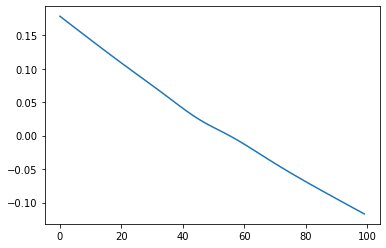

In [73]:
from torchsummary import summary


class CAF(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.Tensor([0.1]), requires_grad=True)
        self.N = 10.0
    
    def forward(self, x):
        return  self.a * caf(x)
    
custom_af = CAF()

Net = torch.nn.Sequential()
Net.add_module("Linear-1", torch.nn.Linear(1, 100))
Net.add_module("Customized AF",  CAF())
Net.add_module("Linear-2",   torch.nn.Linear(100, 1))
y = Net(x)

for name, params in Net.named_parameters():
    if params.requires_grad:
        print(f"name: {name}")
        print(f" Shape: {params.size()}")

plt.plot(y.detach().numpy())